# Explorasi dan Visualisasi Data COVID-19 di Jawa Timur menggunakan Pandas dan Matplotlib

## BACKGROUND

Saat ini, dunia sedang menghadapi krisis kesehatan secara global dan berdampak terhadap sosial ekonomi dikarenakan COVID-19 yang belum pernah terjadi sebelumnya. Di Indonesia kondisi tersebut semakin mengkhawatirkan dikarenakan telah terjadi lonjakan kasus yang kedua pada bulan Februari 2022. Indonesia sendiri telah mengokonfirmasi sejak adanya kasus COVID-19 yang pertama kali terjadi, sehingga UNICEF telah memimpin berbagai upaya dalam merespon pandemi ini bersama dengan pemerintah WHO dan mitra lainnya. Sehingga upaya yang bisa dilakukan saat ini oleh pemerintah yaitu pembatasan sosial dan penutupan sekolah berdampak pada pendidikan, kesehatan mental, dan akses kepada pelayanan kesehatan dasar.
Jawa Timur masih menjadi peringkat ke 4, provinsi yang penyumbang kasus covid di Indonesia dengan persentase sebanyak 9.6%.
Maka dari itu dalam artikel ini ingin menggali lebih dalam bagaimana keadaan Covid di Jawa Timur dengan menggunakan data terbaru.
Pemerintah juga melakukan pengumpulan data dan menyediakan data pertumbuhan kasus COVID19 kepada publik. Sebagai salah satu contoh adalah portal covid19.go.id yang telah dilengkapi dengan dasbor dan grafik visualisasi agar masyrakat lebih mudah dalam memahami informasi. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

Sumber: 
https://www.unicef.org/indonesia/id/coronavirus
https://covid19.go.id/peta-sebaran

## Data Collection

Rekapitulasi data COVID-19 Indonesia tersedia di API publik yang beralamat di https://data.covid19.go.id/public/api/update.json. Untuk mengakses API adalah dengan menggunakan fungsi get dari library requests. Data yang akan digunakan diambil merupakan data real-time langsung dari API (Application Programming Interface) yang telah disediakan pemerintah pada alamat covid19.go.id. 

In [1]:
# Mengakes API covid19.go.id
import requests
resp = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
#mengecek output status atas permintaan data melalui API
print(resp)

<Response [200]>


Status kode yang muncul dari permintaan untuk mengakses API adalah <Response [200]> yang artinya permintaan sukses untuk dipenuhi sehingga dapat dilanjukan untuk teknik pemrosesan data 

In [2]:
# mengecek meta data apa saja yang tersimpan
print(resp.headers)

{'Server': 'nginx', 'Date': 'Thu, 24 Mar 2022 01:35:05 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Thu, 24 Mar 2022 01:26:26 GMT', 'ETag': 'W/"623bc8c2-29736"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


Hasil dari metadata yang tersimpan, rekapitulasi data COVID-10 terakhir diupdate pada tanggal 21 Maret 2022

## Data Preparation

Hasil dari metadata tersebut tidak dapat langsung diproses, perlu dilakukan parsing data json ke dalam python untuk convert json format ke dictionary dengan key dan value-nya akan mengikuti format metadata sebelumnya. 

In [3]:
cov_jatim = resp.json()
cov_jatim

{'last_date': '2022-03-23',
 'provinsi': 'JAWA TIMUR',
 'kasus_total': 571020,
 'kasus_tanpa_tgl': 11,
 'kasus_dengan_tgl': 571009,
 'meninggal_persen': 5.463731568071171,
 'meninggal_tanpa_tgl': 32,
 'meninggal_dengan_tgl': 31167,
 'sembuh_persen': 93.66414486357746,
 'sembuh_tanpa_tgl': 204,
 'sembuh_dengan_tgl': 534637,
 'list_perkembangan': [{'tanggal': 1584489600000,
   'KASUS': 7,
   'MENINGGAL': 1,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 6,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 6},
  {'tanggal': 1584576000000,
   'KASUS': 3,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 3,
   'AKUMULASI_KASUS': 10,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 9},
  {'tanggal': 1584662400000,
   'KASUS': 9,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 9,
   'AKUMULASI_KASUS': 19,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI

In [4]:
print('Length of cov_id_raw : %d.' %len(cov_jatim))
print('Komponen cov_id_raw  : %s.' %cov_jatim.keys())

Length of cov_id_raw : 13.
Komponen cov_id_raw  : dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']).


Setelah menjalankan method key untuk melihat isi elemen yang ada pada raw data cov_jatim, dapat dilihat ringkasan yang meliputi jumlah total kasus COVID-19, persentase kematian dan tingkat kesembuhan sebagai berikut

In [5]:
print('Nama-nama elemen utama:\n', cov_jatim.keys())
print('\nJumlah total kasus COVID-19 di Jawa Timur                 : %d' %cov_jatim['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Timur         : %f.2%%' %cov_jatim['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Timur : %f.2%%' %cov_jatim['sembuh_persen'])


Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Timur                 : 571020
Persentase kematian akibat COVID-19 di Jawa Timur         : 5.463732.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Timur : 93.664145.2%


## Analisis data

Pada analisis data perlu diketahui mengenai kolom apa saja yang tersedia dan memilih mana saja kolom mana saja yang digunakan eksplorasi lebih dalam maupun untuk memilih kolom yang tidak digunakan

In [61]:
import pandas as pd
cov_jatim_list = pd.DataFrame(cov_jatim['list_perkembangan'])
print('Info cov_jatim:\n', cov_jatim_list.info())
cov_jatim_list.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       736 non-null    int64
 1   KASUS                         736 non-null    int64
 2   MENINGGAL                     736 non-null    int64
 3   SEMBUH                        736 non-null    int64
 4   DIRAWAT_OR_ISOLASI            736 non-null    int64
 5   AKUMULASI_KASUS               736 non-null    int64
 6   AKUMULASI_SEMBUH              736 non-null    int64
 7   AKUMULASI_MENINGGAL           736 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  736 non-null    int64
dtypes: int64(9)
memory usage: 51.9 KB
Info cov_jatim:
 None


,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1584489600000,7,1,0,6,7,0,1,6
1,1584576000000,3,0,0,3,10,0,1,9
2,1584662400000,9,0,0,9,19,0,1,18
3,1584748800000,9,1,0,8,28,0,2,26
4,1584835200000,14,0,0,14,42,0,2,40


Dari dataframe cov_jatim_list terdapat beberapa hal yang harus diperbaiki yaitu format pada kolom tanggal sulit untuk dibaca dan tidak konsisten. Selain itu kolom yang akan diambil untuk visualisasi adalah kolom KASUS, MENINGGAL dan SEMBUH. 

In [7]:
cov_jatim_tidy = (cov_jatim_list.drop(columns=[item for item in cov_jatim_list.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns') #nano second
cov_jatim_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-18,7,1,0
1,2020-03-19,3,0,0
2,2020-03-20,9,0,0
3,2020-03-21,9,1,0
4,2020-03-22,14,0,0


## Data Visualisasi

C:\Users\DELL\AppData\Local\Temp/ipykernel_2432/3500300860.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

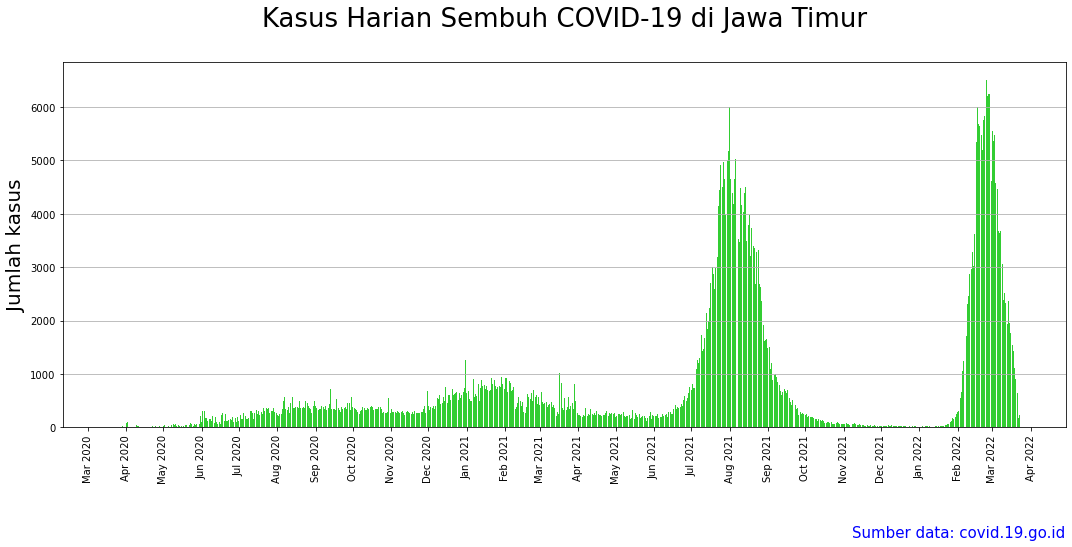

In [57]:
#menunjukan melalui gambar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf() #untuk menghapus figure sebelumnya klo plt.close mengahpus seluruh gambar jd mending pakai plt.clf
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='sembuh', color='limegreen')
ax.set_title('Kasus Harian Sembuh COVID-19 di Jawa Timur\n',
             fontsize=26)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', fontsize=15,
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.savefig('sembuh.png', dpi=200)
plt.show();

C:\Users\DELL\AppData\Local\Temp/ipykernel_2432/965151813.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

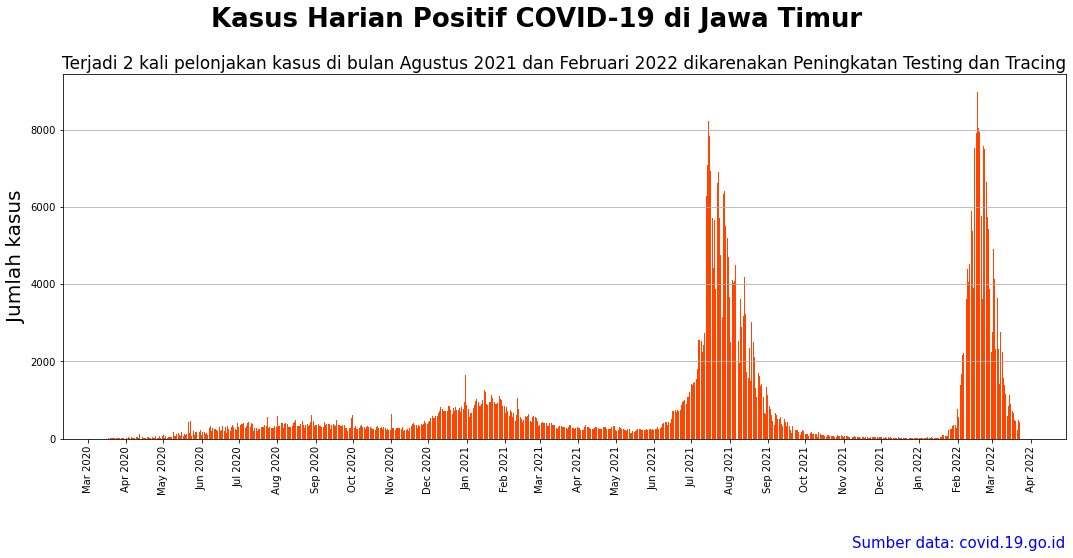

In [58]:
# ADD INFO GRAFIK(jadinya seperti storyline singkat)
plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='kasus_baru', color='orangered')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Timur', 
             y=1.00, fontsize=26, fontweight='bold', ha='center')
ax.set_title('Terjadi 2 kali pelonjakan kasus di bulan Agustus 2021 dan Februari 2022 dikarenakan Peningkatan Testing dan Tracing',
             fontsize=17)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', fontsize=15,
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')  #y biar gridnya vertikal, klo x nanti jadinya horizontal
plt.tight_layout()
plt.savefig('positif.png')
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_2432/888456866.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

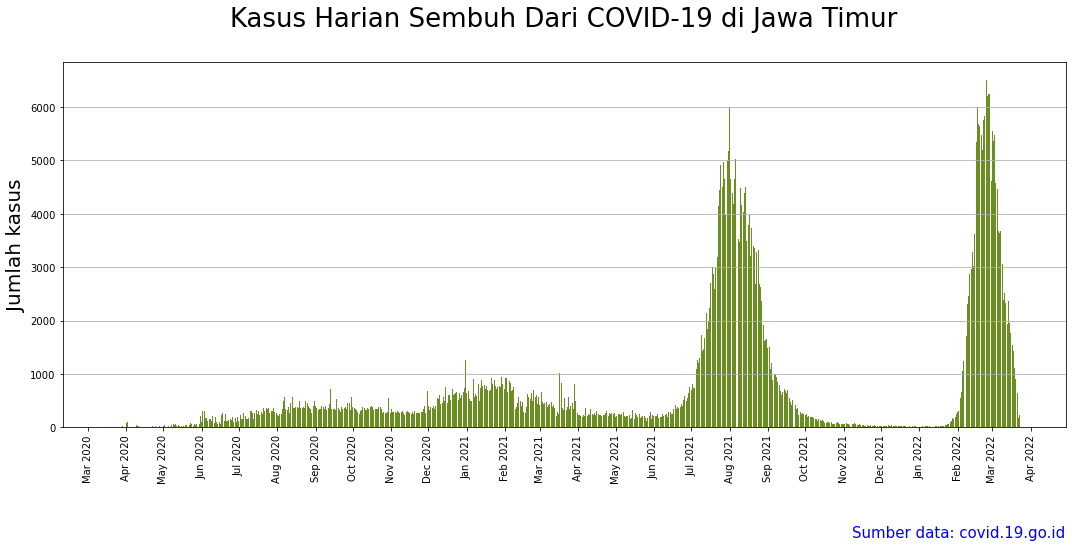

In [10]:
#GRAFIK UNTUK KASUS SEMBUH
plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='sembuh', color='olivedrab') #krn yg diminta kasus sembuh
ax.set_title('Kasus Harian Sembuh COVID-19 di Jawa Timur\n',
             fontsize=26)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue', fontsize=15,
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp/ipykernel_2432/953181892.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

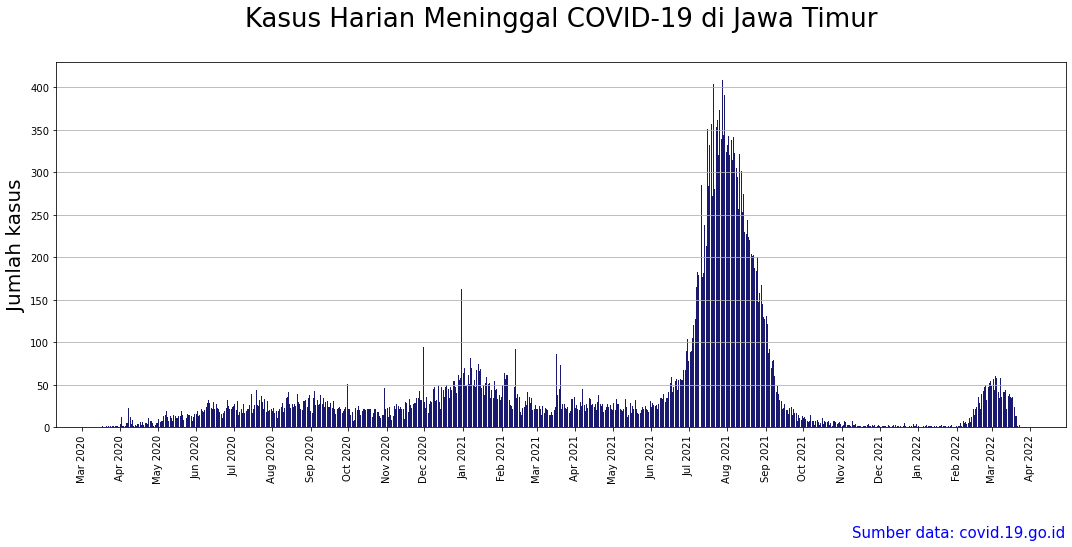

In [59]:
#Grafik untuk Kasus Meninggal
plt.clf()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='meninggal', color='midnightblue')
ax.set_title('Kasus Harian Meninggal COVID-19 di Jawa Timur\n',
             fontsize=26)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus', fontsize=20)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', fontsize=15, transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) #format menjadi singkatan bulan dan taunnya saja 

plt.grid(axis='y')
plt.tight_layout()
plt.savefig('meninggal.png', dpi=200)
plt.show()

## Bagaimana perkembangan kasus Covid-19 dalam rentang waktu pekanan

Membuat dataframe baru agar lebih mudah dalam membuat visualisasi data covid-19 perpekannya. Dikarenakan kolom yang tersedia terbatas maka dari itu perlu beberapa tahapan yang perlukan untuk mengolah data.
1. menjadikan frekuensi total kasus secara pekanan.
2. membuat kolom baru berupa tahunnya saja.
3. membuat kolom berupa urutan pekan pertahunnya. 
4. menambahkan 2 kolom untuk membandingkan per pekan dengan pekan kedepannya apakah total kasus semakin baik atau buruk

In [12]:
#perkembangan kasus dalam rentang waktu pekanan
cov_jatim_pekan = (cov_jatim_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W') #menjadikan frekuensi total kasus secara pekanan 
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jatim_pekan['tahun'] = cov_jatim_pekan['tanggal'].apply(lambda x: x.year) #membuat kolom baru berupa tahun 
cov_jatim_pekan['pekan_ke'] =cov_jatim_pekan['tanggal'].apply(lambda x:x.weekofyear) # membuat kolom baru urutan pekan dalam setahunnya 
cov_jatim_pekan = cov_jatim_pekan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jatim_pekanan:')
print(cov_jatim_pekan.info())
print('\nLima data teratas cov_jatim_pekanan:\n', cov_jatim_pekan.head())

Info cov_jatim_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     106 non-null    int64
 1   pekan_ke  106 non-null    int64
 2   jumlah    106 non-null    int64
dtypes: int64(3)
memory usage: 2.6 KB
None

Lima data teratas cov_jatim_pekanan:
    tahun  pekan_ke  jumlah
0   2020        12      42
1   2020        13      56
2   2020        14     104
3   2020        15     221
4   2020        16     213


In [13]:
#membandingkan jumlah kasus per pekan dari pekan lalu dengan jumlah pekan berikutnya
import numpy as np
cov_jatim_pekan['jumlah_pekanlalu'] = cov_jatim_pekan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jatim_pekan['apa_lebih_baik'] = cov_jatim_pekan['jumlah'] < cov_jatim_pekan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jatim_pekan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  apa_lebih_baik
0   2020        12      42                 0           False
1   2020        13      56                42           False
2   2020        14     104                56           False
3   2020        15     221               104           False
4   2020        16     213               221            True
5   2020        17     192               213            True
6   2020        18     332               192           False
7   2020        19     402               332           False
8   2020        20     673               402           False
9   2020        21    1455               673           False


C:\Users\DELL\AppData\Local\Temp/ipykernel_2432/435051251.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jatim_pekan['jumlah_pekanlalu'] = cov_jatim_pekan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


<Figure size 432x288 with 0 Axes>

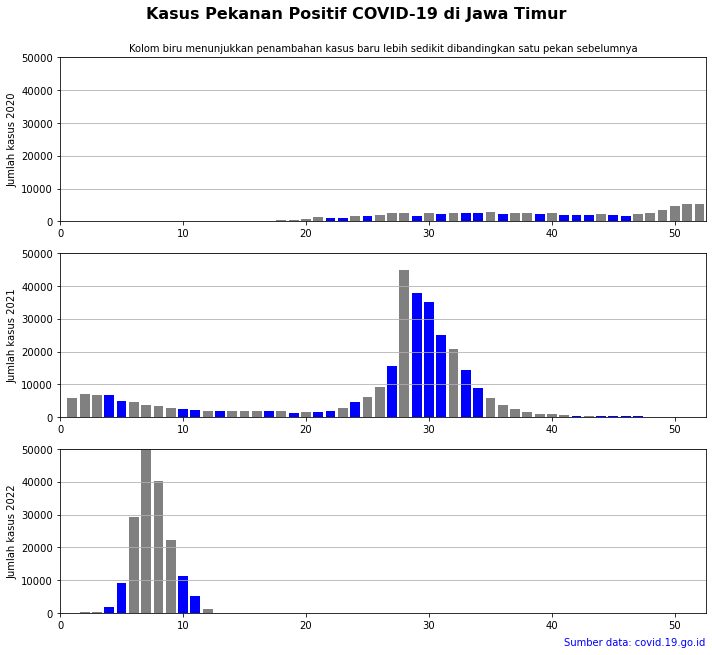

In [45]:
# menambahkan bar chart untuk menjawab pertanyaan apakah pekan kedepannya lebih baik dari pekan sebelumnya
plt.clf()
jml_tahun_terjadi_covid19 = cov_jatim_pekan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jatim_pekan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Timur',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jatim_pekan.loc[cov_jatim_pekan['tahun']==tahun_terjadi_covid19[i]],
           x='pekan_ke', height='jumlah',
           color=['blue' if x is True else 'grey'
                  for x in cov_jatim_pekan['apa_lebih_baik']])
    if i == 0:
        ax.set_title('Kolom biru menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
                ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jatim_pekan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.savefig('tiap pekan.png', dpi=200)
plt.show()

## Akumulasi kasus COVID-19

Setelah membuat bar plot untuk mengetahui bagaimana jumlah kasus aktif, sembuh dan meninggal setiap bulannya dan juga bar plot untuk membandingkan perpekan, kali ini perlu melihat bagaimana tren dari kasus COVID-19 berdasarkan akumulasi kasus aktif, sembuh dan meninggal. Untuk melihat tren dari waktu ke waktu dapat memanfaatkan line chart sebagai visualisasi datanya.

In [15]:
# menghitung jumlah kasus aktif dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal
cov_jatim_akumulasi = cov_jatim_tidy[['tanggal']].copy()
cov_jatim_akumulasi['akumulasi_aktif'] = (cov_jatim_tidy['kasus_baru'] - cov_jatim_tidy['sembuh'] - cov_jatim_tidy['meninggal']).cumsum()
cov_jatim_akumulasi['akumulasi_sembuh'] = cov_jatim_tidy['sembuh'].cumsum()
cov_jatim_akumulasi['akumulasi_meninggal'] = cov_jatim_tidy['meninggal'].cumsum()
print(cov_jatim_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
731 2022-03-19             5586            532689                31136
732 2022-03-20             5122            533592                31149
733 2022-03-21             4694            534235                31162
734 2022-03-22             4990            534415                31164
735 2022-03-23             5205            534637                31167


In [16]:
cov_jatim_akumulasi.describe()

,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
count,736.000000,736.000000,736.000000
mean,6090.692935,167495.866848,13306.762228
std,10541.998525,154941.624609,11558.607271
min,-735.000000,0.000000,1.000000
25%,595.500000,33325.500000,3288.250000
50%,2379.000000,122674.000000,9600.000000
75%,5637.250000,360885.000000,29243.000000
max,55604.000000,534637.000000,31167.000000


In [17]:
cov_jatim_akumulasi.loc[cov_jatim_akumulasi['akumulasi_aktif'].idxmax()]

tanggal                2021-07-29 00:00:00
akumulasi_aktif                      55604
akumulasi_sembuh                    222950
akumulasi_meninggal                  19934
Name: 498, dtype: object

In [54]:
cov_jatim_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
731,2022-03-19,5586,532689,31136
732,2022-03-20,5122,533592,31149
733,2022-03-21,4694,534235,31162
734,2022-03-22,4990,534415,31164
735,2022-03-23,5205,534637,31167


C:\Users\DELL\AppData\Local\Temp/ipykernel_2432/3218849561.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 432x288 with 0 Axes>

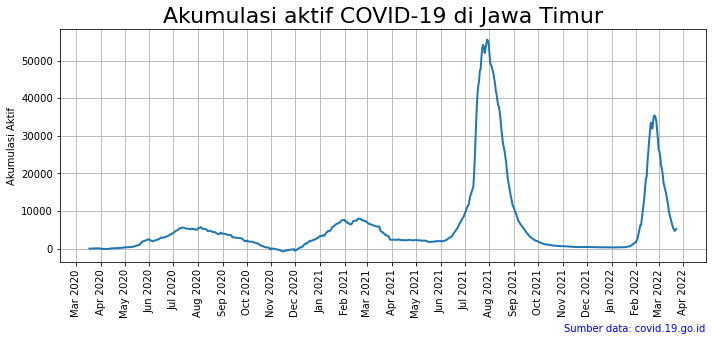

In [19]:
# membuat linechart akumulasi kasus aktif
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jatim_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('  ')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

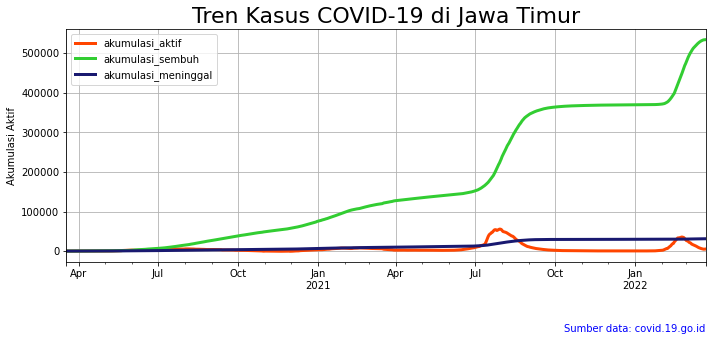

In [60]:
#membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jatim_akumulasi_ts = cov_jatim_akumulasi.set_index('tanggal')
cov_jatim_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                     color=['orangered', 'limegreen', 'midnightblue'])

ax.set_title('Tren Kasus COVID-19 di Jawa Timur',
         fontsize=22)
ax.set_xlabel(' ')
ax.set_ylabel('Akumulasi Aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
      ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.savefig('akumulasi.png', dpi=200)
plt.show()
